<a href="https://colab.research.google.com/github/SALMA22TA/NLPTask/blob/main/Sentiment_Analysis_Task_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [5]:
# Mount Google Drive
drive.mount('/content/drive')

# Step 1: Load the new dataset
df = pd.read_csv('/content/drive/MyDrive/NLP/IMDB Dataset.csv')

# Verify the dataset is loaded
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
# Clean the text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text

df['review'] = df['review'].apply(clean_text)

In [7]:
# Encode the sentiment labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])
y = df['sentiment_encoded'].values

In [8]:
# Tokenize and pad the text data
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Build and Train the RNN Model
embedding_dim = 100

rnn_model = Sequential([
    Embedding(max_words, embedding_dim),
    Bidirectional(SimpleRNN(128, return_sequences=False)),  # Use Bidirectional RNN
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [13]:
# Train with more epochs and early stopping
rnn_history = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 163s 163ms/step - accuracy: 0.4934 - loss: 0.6943 - val_accuracy: 0.5001 - val_loss: 0.6932
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 199s 161ms/step - accuracy: 0.5021 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 163s 163ms/step - accuracy: 0.5091 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 203s 164ms/step - accuracy: 0.5043 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931


In [14]:
# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"RNN Test Accuracy: {rnn_accuracy:.4f}")

RNN Test Accuracy: 0.4965


In [15]:
# Build and Train the LSTM Model
lstm_model = Sequential([
    Embedding(max_words, embedding_dim),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Train with early stopping
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 359s 356ms/step - accuracy: 0.5126 - loss: 0.6935 - val_accuracy: 0.5079 - val_loss: 0.6925
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 383s 356ms/step - accuracy: 0.5470 - loss: 0.6810 - val_accuracy: 0.5362 - val_loss: 0.6910
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 383s 357ms/step - accuracy: 0.5223 - loss: 0.6901 - val_accuracy: 0.5614 - val_loss: 0.6718
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 380s 355ms/step - accuracy: 0.5858 - loss: 0.6595 - val_accuracy: 0.5411 - val_loss: 0.6869
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 382s 355ms/step - accuracy: 0.6186 - loss: 0.6353 - val_accuracy: 0.8430 - val_loss: 0.3744
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 381s 355ms/step - accuracy: 0.8805 - loss: 0.3282 - val_accuracy: 0.8635 - val_loss: 0.3212
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 356s 356ms/step - accuracy: 0.9193 - loss: 0.2333 - val_accuracy: 0.8651 - val_loss: 0.3212
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 383s 357ms/step - ac

In [17]:
# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")

LSTM Test Accuracy: 0.8728


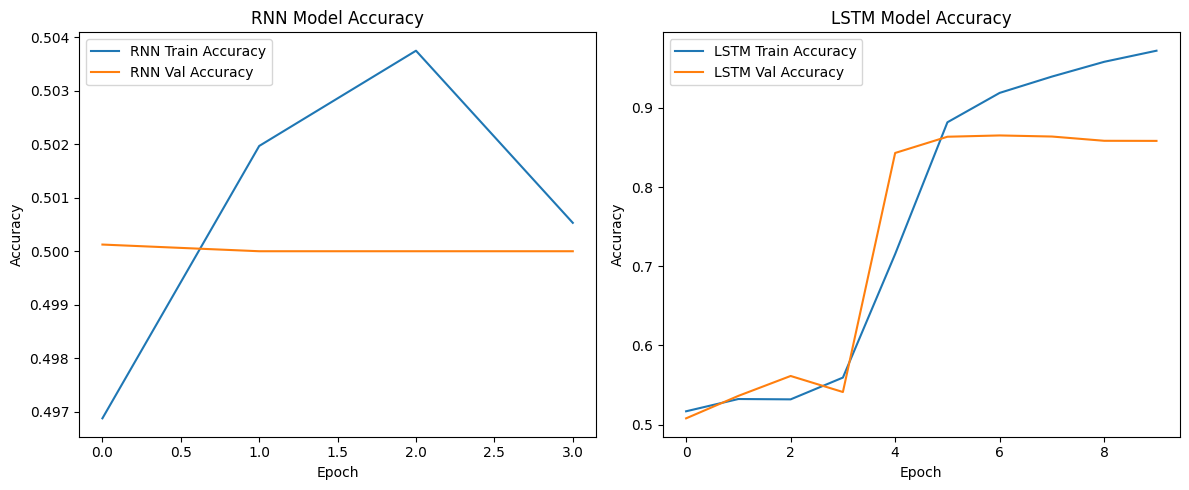

In [18]:
plt.figure(figsize=(12, 5))

# RNN Accuracy
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='RNN Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Val Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# LSTM Accuracy
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Compare the Models
print("\nModel Comparison:")
print(f"RNN Test Accuracy: {rnn_accuracy:.4f}")
print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")


Model Comparison:
RNN Test Accuracy: 0.4965
LSTM Test Accuracy: 0.8728


In [20]:
# Additional Evaluation Metrics
from sklearn.metrics import classification_report
y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")
print("RNN Classification Report:")
print(classification_report(y_test, y_pred_rnn, target_names=label_encoder.classes_))
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=label_encoder.classes_))

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 107ms/step
RNN Classification Report:
              precision    recall  f1-score   support

    negative       0.50      0.99      0.66      4961
    positive       0.51      0.01      0.03      5039

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.34     10000
weighted avg       0.51      0.50      0.34     10000

LSTM Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.88      0.87      4961
    positive       0.88      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

